In [1]:
import pandas as pd

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [5]:
from sklearn.compose import ColumnTransformer


In [6]:
from sklearn.pipeline import Pipeline


In [7]:
from sklearn.svm import SVC 


In [8]:
from sklearn.linear_model import LogisticRegression 

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
import xgboost as xgb

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
import seaborn as sns

In [13]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [14]:
df=pd.read_csv("data_1.csv")


In [15]:
df

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes
...,...,...,...,...,...,...,...
866,Buffaloes,Fever,Difficulty breathing,Poor Appetite,Eye and Skin change,Unable to exercise,Yes
867,Buffaloes,Fever,Loss of appetite,Lession on the skin,Lethargy,Joint Pain,Yes
868,Buffaloes,Lesions in the nasal cavity,Lesions on nose,Vomiting,Noisy Breathing,Lesions on nose,Yes
869,Buffaloes,Hair loss,Dandruff,Vomiting,Crusting of the skin,Ulcerated skin,Yes


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dangerous', ylabel='count'>

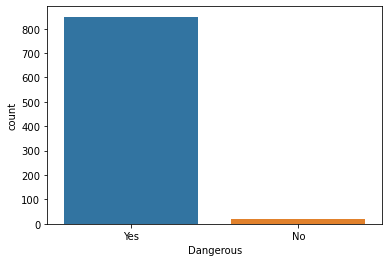

In [16]:
sns.countplot(df['Dangerous'])

In [17]:
df['symptoms']=df[['symptoms1','symptoms2','symptoms3','symptoms4','symptoms5']].apply(lambda x:" ".join(x),axis=1)

In [18]:
df

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous,symptoms
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes,Fever Diarrhea Vomiting Weight loss Dehydration
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes,Fever Diarrhea Coughing Tiredness Pains
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes,Fever Diarrhea Coughing Vomiting Anorexia
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes,Fever Difficulty breathing Coughing Lethargy S...
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes,Fever Diarrhea Coughing Lethargy Blue Eye
...,...,...,...,...,...,...,...,...
866,Buffaloes,Fever,Difficulty breathing,Poor Appetite,Eye and Skin change,Unable to exercise,Yes,Fever Difficulty breathing Poor Appetite Eye a...
867,Buffaloes,Fever,Loss of appetite,Lession on the skin,Lethargy,Joint Pain,Yes,Fever Loss of appetite Lession on the skin Le...
868,Buffaloes,Lesions in the nasal cavity,Lesions on nose,Vomiting,Noisy Breathing,Lesions on nose,Yes,Lesions in the nasal cavity Lesions on nose Vo...
869,Buffaloes,Hair loss,Dandruff,Vomiting,Crusting of the skin,Ulcerated skin,Yes,Hair loss Dandruff Vomiting Crusting of the sk...


In [19]:
df=df.drop(['symptoms1','symptoms2','symptoms3','symptoms4','symptoms5'],axis=1)

In [20]:
df

,AnimalName,Dangerous,symptoms
0,Dog,Yes,Fever Diarrhea Vomiting Weight loss Dehydration
1,Dog,Yes,Fever Diarrhea Coughing Tiredness Pains
2,Dog,Yes,Fever Diarrhea Coughing Vomiting Anorexia
3,Dog,Yes,Fever Difficulty breathing Coughing Lethargy S...
4,Dog,Yes,Fever Diarrhea Coughing Lethargy Blue Eye
...,...,...,...
866,Buffaloes,Yes,Fever Difficulty breathing Poor Appetite Eye a...
867,Buffaloes,Yes,Fever Loss of appetite Lession on the skin Le...
868,Buffaloes,Yes,Lesions in the nasal cavity Lesions on nose Vo...
869,Buffaloes,Yes,Hair loss Dandruff Vomiting Crusting of the sk...


In [21]:
le=LabelEncoder()


In [22]:
df['AnimalName']=le.fit_transform(df['AnimalName'])


In [23]:
df['Dangerous']=le.fit_transform(df['Dangerous'])

In [24]:
df

,AnimalName,Dangerous,symptoms
0,6,1,Fever Diarrhea Vomiting Weight loss Dehydration
1,6,1,Fever Diarrhea Coughing Tiredness Pains
2,6,1,Fever Diarrhea Coughing Vomiting Anorexia
3,6,1,Fever Difficulty breathing Coughing Lethargy S...
4,6,1,Fever Diarrhea Coughing Lethargy Blue Eye
...,...,...,...
866,2,1,Fever Difficulty breathing Poor Appetite Eye a...
867,2,1,Fever Loss of appetite Lession on the skin Le...
868,2,1,Lesions in the nasal cavity Lesions on nose Vo...
869,2,1,Hair loss Dandruff Vomiting Crusting of the sk...


In [25]:
X=df.drop('Dangerous',axis=1)

In [26]:
y=df['Dangerous']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [28]:
X_train.shape

(696, 2)

In [29]:
X_test.shape

(175, 2)

In [30]:
# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('symptoms', TfidfVectorizer(), 'symptoms')
    ])


In [31]:
preprocessor

ColumnTransformer(transformers=[('symptoms', TfidfVectorizer(), 'symptoms')])

# SVM

In [32]:
#modeling pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', SVC())  # Using Support Vector Machine Classifier as an example
])

In [33]:
model.fit(X_train, y_train)

# Evaluating the model
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.9885714285714285


# RandomForestClassifier

In [34]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier())  # Using Support Vector Machine Classifier as an example
])

In [35]:
model.fit(X_train, y_train)

# Evaluating the model
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 1.0


# LogisticRegression

In [36]:
#modeling pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression())  # Using Support Vector Machine Classifier as an example
])

In [37]:
model.fit(X_train, y_train)

# Evaluating the model
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.9885714285714285


# KNeighborsClassifier

In [38]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', KNeighborsClassifier())  # Using Support Vector Machine Classifier as an example
])

In [39]:
model.fit(X_train, y_train)

# Evaluating the model
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.9885714285714285


# XGBClassifier

In [40]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', xgb.XGBClassifier())  # Using Support Vector Machine Classifier as an example
])

In [41]:
model.fit(X_train, y_train)

# Evaluating the model
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 1.0
